In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

In [3]:
import splitfolders

# Path to the dataset folder
input_folder = r"C:\Users\91636\OneDrive\Documents\mini project\data set final"  # Replace with the path to your dataset folder

# Output folder where the split data will be saved
output_folder = r"C:\Users\91636\OneDrive\Documents\mini project\dataset split"  # Replace with the path where you want the split data

# Split the dataset into train (80%), validation (10%), and test (10%)
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=1345,
    ratio=(0.8, 0.1, 0.1),
    group_prefix=None
)

print("Dataset split completed. Check the output folder.")

Copying files: 7500 files [00:12, 597.44 files/s]

Dataset split completed. Check the output folder.


In [5]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\91636\OneDrive\Documents\mini project\dataset split\train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\91636\OneDrive\Documents\mini project\dataset split\test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\91636\OneDrive\Documents\mini project\dataset split\val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 6000 files belonging to 3 classes.
Found 750 files belonging to 3 classes.
Found 750 files belonging to 3 classes.


In [7]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\91636\OneDrive\Documents\mini project\dataset split\train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\91636\OneDrive\Documents\mini project\dataset split\test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\91636\OneDrive\Documents\mini project\dataset split\val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 6000 files belonging to 3 classes.
Found 750 files belonging to 3 classes.
Found 750 files belonging to 3 classes.


In [9]:
for images, labels in train_ds.take(1):
    print("Labels Shape:", labels.shape)
    print("Labels Example:", labels[0].numpy())

Labels Shape: (64,)
Labels Example: 0


In [11]:
# Display class names
class_names = train_ds.class_names
print("Class Names:", class_names)

# Inspect the training dataset
print("Training Dataset Details:")
print(train_ds)



Class Names: ['Benign', 'Malignant', 'Non-cancer(da)']
Training Dataset Details:
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


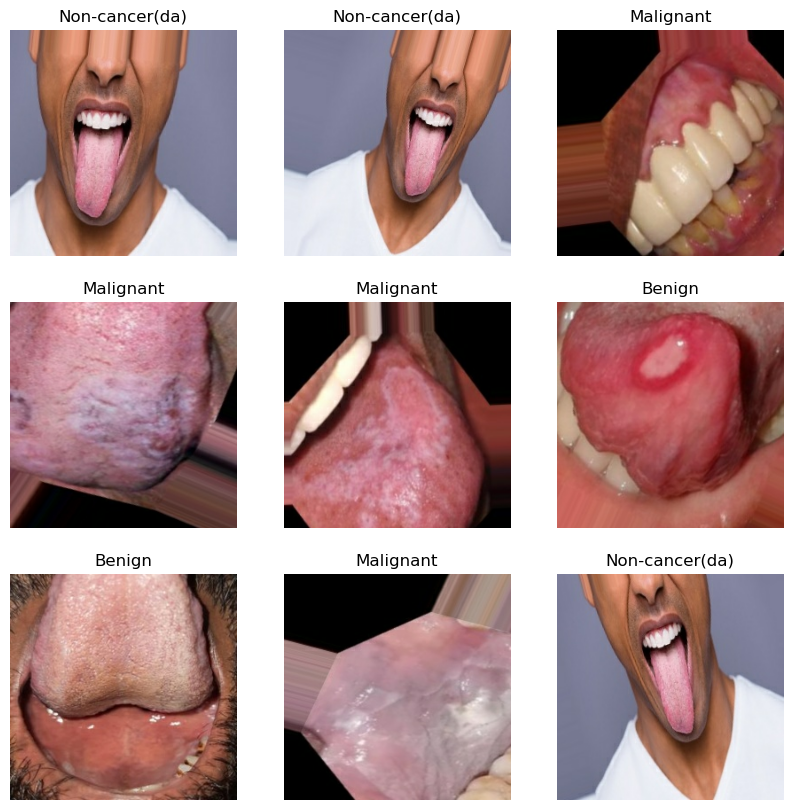

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch of data
    for i in range(9):  # Display the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])  # Directly map label to class name
        plt.axis("off")
plt.show()

In [15]:
from tensorflow.keras import layers, models, optimizers

# Initialize the model
model = models.Sequential()

# Rescaling Layer
model.add(layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# First Convolutional Block
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Block
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Block
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(layers.Dropout(0.5))  # Regularization to prevent overfitting

# Output Layer for Multi-Class Classification
model.add(layers.Dense(3, activation="softmax"))  # 3 classes: non-cancerous, benign, malignant

# Compile the Model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model Summary
model.summary()

C:\Users\91636\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,779,459 (33.49 MB)

 Trainable params: 8,778,499 (33.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
    metrics=['accuracy']
)

In [19]:
hist = model.fit(train_ds, validation_data=val_ds, epochs=30, batch_size=64, verbose=1)


Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 485s 5s/step - accuracy: 0.7775 - loss: 2.8267 - val_accuracy: 0.5720 - val_loss: 8.7646
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 514s 5s/step - accuracy: 0.8657 - loss: 0.3565 - val_accuracy: 0.7347 - val_loss: 1.4758
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 468s 5s/step - accuracy: 0.8544 - loss: 0.3354 - val_accuracy: 0.7573 - val_loss: 3.0029
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 393s 4s/step - accuracy: 0.8648 - loss: 0.3855 - val_accuracy: 0.8840 - val_loss: 0.8402
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.8896 - loss: 0.2524 - val_accuracy: 0.8960 - val_loss: 0.3211
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.9019 - loss: 0.2527 - val_accuracy: 0.9133 - val_loss: 0.3601
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.8990 - loss: 0.2438 - val_accuracy: 0.9333 - val_loss: 0.1777
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9094 - loss: 0.2075 - val_accuracy: 0.9427 - v

In [21]:
loss, accuracy = model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 457ms/step - accuracy: 0.9610 - loss: 0.1599


In [23]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

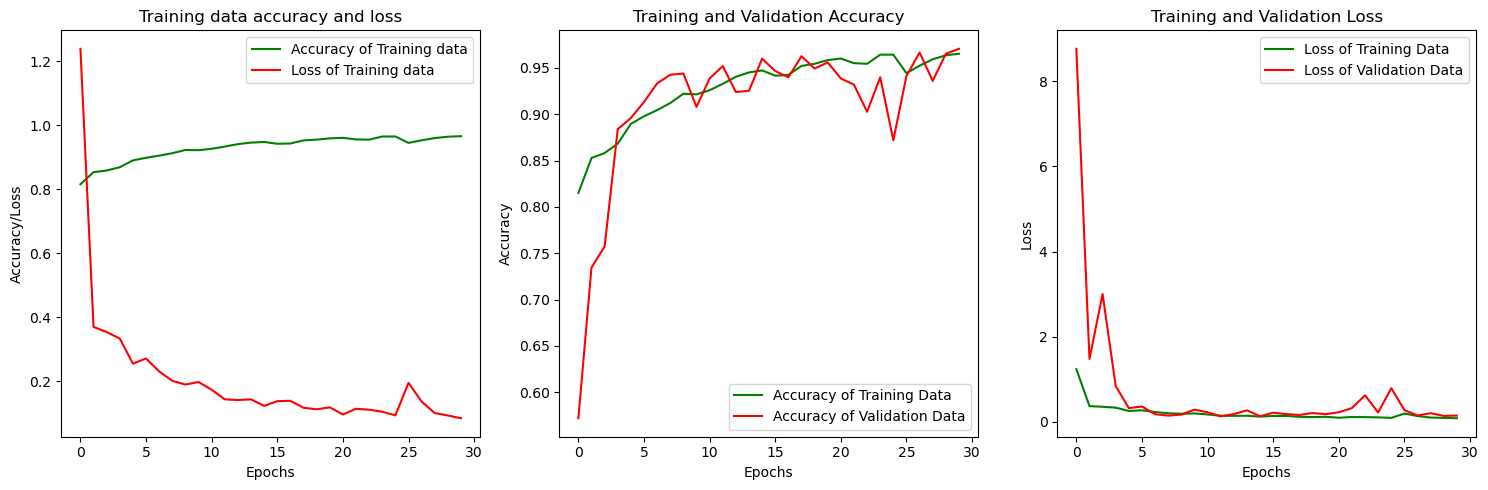

In [25]:
import matplotlib.pyplot as plt

epochs = range(len(get_ac))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(epochs, get_ac, 'g', label='Accuracy of Training data')
axs[0].plot(epochs, get_los, 'r', label='Loss of Training data')
axs[0].set_title('Training data accuracy and loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel("Accuracy/Loss")
axs[0].legend(loc=0)

axs[1].plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
axs[1].plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
axs[1].set_title('Training and Validation Accuracy')
axs[1].legend(loc=0)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

axs[2].plot(epochs, get_los, 'g', label='Loss of Training Data')
axs[2].plot(epochs, val_loss, 'r', label='Loss of Validation Data')
axs[2].set_title('Training and Validation Loss')
axs[2].legend(loc=0)
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Loss')

plt.tight_layout()

plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step


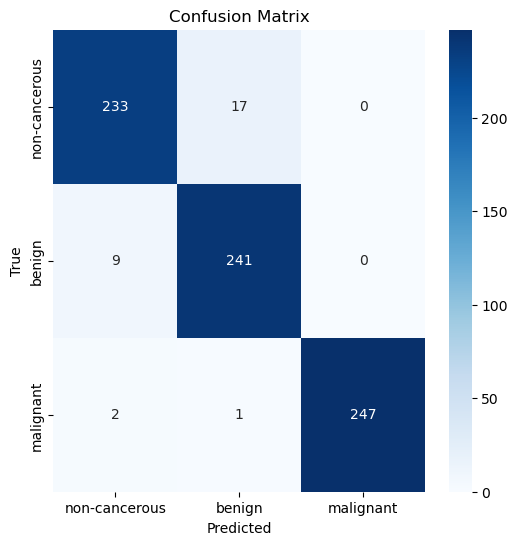

Classification Report:
               precision    recall  f1-score   support

non-cancerous       0.95      0.93      0.94       250
       benign       0.93      0.96      0.95       250
    malignant       1.00      0.99      0.99       250

     accuracy                           0.96       750
    macro avg       0.96      0.96      0.96       750
 weighted avg       0.96      0.96      0.96       750



In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists for true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset
for images, labels in test_ds:
    true_labels.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Predict on the batch
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted class indices

# Generate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Define class names (ensure this matches your dataset's class names)
class_names = ['non-cancerous', 'benign', 'malignant']

# Plot the confusion matrix
plt.figure(figsize=(6, 6))  # Adjusted figure size
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

In [31]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

training_loss_values = hist.history['loss']
training_accuracy_values = hist.history['accuracy']
val_loss_values = hist.history['val_loss']
val_accuracy_values = hist.history['val_accuracy']

mean_training_loss = np.mean(training_loss_values)
mean_training_accuracy = np.mean(training_accuracy_values)
mean_val_loss = np.mean(val_loss_values)
mean_val_accuracy = np.mean(val_accuracy_values)

print("Mean Training Loss:", mean_training_loss)
print("Mean Training Accuracy:", mean_training_accuracy)
print("Mean Validation Loss:", mean_val_loss)
print("Mean Validation Accuracy:", mean_val_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Precision: 0.9309721760336991
Recall: 0.916
F1 Score: 0.9153620210071823
Accuracy: 0.916
Mean Training Loss: 0.26483472337325414
Mean Training Accuracy: 0.8775111099084218
Mean Validation Loss: 1.1797219519813855
Mean Validation Accuracy: 0.8773777812719346


In [29]:
model.save('my_model.h5)

SyntaxError: unterminated string literal (detected at line 1) (3450480460.py, line 1)

In [31]:
model.save('my_model.h5')